In [1]:
import pandas as pd
import numpy as np
import time

C:\Users\16957\Anaconda3\envs\DataMining\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\16957\Anaconda3\envs\DataMining\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
df_train = pd.read_csv('data/pm25_train.csv')
df_test = pd.read_csv('data/pm25_test.csv')

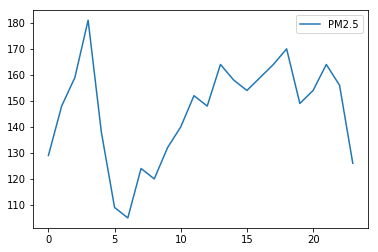

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_train[df_train['date'] == '2010-01-02']['hour'], df_train[df_train['date'] == '2010-01-02']['pm2.5'], label='PM2.5')
plt.legend(loc=1)
plt.show()

In [12]:
def date_analysis(df):
    time_data = []
    for date in df['date'].tolist():
        # 解析时间字符串
        t = time.strptime(date, '%Y-%m-%d')
        rst = []
        rst.append(t.tm_year)
        rst.append(t.tm_mon)
        rst.append(t.tm_mday)
        rst.append(t.tm_wday)
        time_data.append(rst)
    time_data = np.array(time_data)
    df['year'] = time_data[:, 0]
    df['month'] = time_data[:, 1]
    df['day'] = time_data[:, 2]
    df['week'] = time_data[:, 3]
date_analysis(df_train)
date_analysis(df_test)

In [13]:
df_train.drop(columns=['date'], inplace=True)
df_test.drop(columns=['date'], inplace=True)

In [17]:
from sklearn.preprocessing import MinMaxScaler
for item in df_train.columns:
    if item != 'pm2.5':
        scaler = MinMaxScaler()
        scaler.fit(np.vstack((df_train[item].values.reshape(-1,1), df_test[item].values.reshape(-1,1))))
        df_train[item] = scaler.transform(df_train[item].values.reshape(-1,1))
        df_test[item] = scaler.transform(df_test[item].values.reshape(-1,1))
        
    

C:\Users\16957\Anaconda3\envs\DataMining\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\16957\Anaconda3\envs\DataMining\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\16957\Anaconda3\envs\DataMining\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\16957\Anaconda3\envs\DataMining\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\16957\Anaconda3\envs\DataMining\lib\site-packages\sklearn\utils\validation.

In [18]:

df_train.to_csv('data/train_1.csv', index=False)
df_test.to_csv('data/test_1.csv', index=False)